<a href="https://colab.research.google.com/github/Yash19934/pytorch_tutorial/blob/main/Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class NeuralNetwork(nn.Module):
  def __init__(self, input_features = 4, h1 = 10, h2 = 10, output_features = 3):
    super().__init__()
    self.fc1 = nn.Linear(input_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, output_features)

  def forward(self, x):
    x = nn.functional.relu(self.fc1(x))
    x = nn.functional.relu(self.fc2(x))
    x = self.out(x)
    return x

In [3]:

# # Create a Model Class that inherits nn.Module
# class Model(nn.Module):
#   # Input layer (4 features of the flower) -->
#   # Hidden Layer1 (number of neurons) -->
#   # H2 (n) -->
#   # output (3 classes of iris flowers)
#   def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
#     super().__init__() # instantiate our nn.Module
#     self.fc1 = nn.Linear(in_features, h1)
#     self.fc2 = nn.Linear(h1, h2)
#     self.out = nn.Linear(h2, out_features)

#   def forward(self, x):
#     x = F.relu(self.fc1(x))
#     x = F.relu(self.fc2(x))
#     x = self.out(x)

#     return x


In [4]:
torch.manual_seed(42)
model = NeuralNetwork()

In [5]:
#Loading data and splitting train,test and converting it to tensor

In [6]:
data_link = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
df = pd.read_csv(data_link)
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [7]:
#encoding target feature


mapping = {
    "Setosa": 0,
    "Virginica": 1,
    "Versicolor": 2
}

df["variety"] = df["variety"].apply(lambda x : mapping[x])

In [8]:
X = df.drop("variety", axis = 1).values
y = df["variety"].values

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
#Convert to tensors
X_train_tensor = torch.tensor(X_train, dtype = torch.float32)
X_test_tensor = torch.tensor(X_test, dtype = torch.float32)
y_train_tensor = torch.tensor(y_train, dtype = torch.int64)
y_test_tensor = torch.tensor(y_test, dtype = torch.int64)

In [12]:
print(model)

NeuralNetwork(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=3, bias=True)
)


In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [14]:
epochs = 500
losses = []
for i in range(epochs):
  #print(i)
  # Go forward and get a prediction
  y_pred = model.forward(X_train_tensor) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train_tensor) # predicted values vs the y_train

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

#torch.no_grad()

Epoch: 0 and loss: 1.1379072666168213
Epoch: 10 and loss: 1.1122320890426636
Epoch: 20 and loss: 1.0935394763946533
Epoch: 30 and loss: 1.0712181329727173
Epoch: 40 and loss: 1.0552467107772827
Epoch: 50 and loss: 1.0387349128723145
Epoch: 60 and loss: 1.0185030698776245
Epoch: 70 and loss: 0.9946019053459167
Epoch: 80 and loss: 0.9678165316581726
Epoch: 90 and loss: 0.9305185675621033
Epoch: 100 and loss: 0.8656412959098816
Epoch: 110 and loss: 0.8186376094818115
Epoch: 120 and loss: 0.7699631452560425
Epoch: 130 and loss: 0.7233131527900696
Epoch: 140 and loss: 0.6803855895996094
Epoch: 150 and loss: 0.6414175629615784
Epoch: 160 and loss: 0.6064914464950562
Epoch: 170 and loss: 0.5753880739212036
Epoch: 180 and loss: 0.5476295948028564
Epoch: 190 and loss: 0.5227162837982178
Epoch: 200 and loss: 0.5002070665359497
Epoch: 210 and loss: 0.479570209980011
Epoch: 220 and loss: 0.4605027437210083
Epoch: 230 and loss: 0.4426511228084564
Epoch: 240 and loss: 0.4255627691745758
Epoch: 250 a

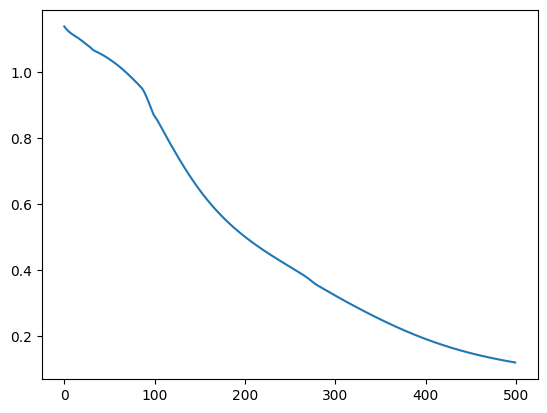

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(epochs), losses)

In [16]:
with torch.no_grad():
  y_pred = model.forward(X_test_tensor)
  loss = criterion(y_pred, y_test_tensor)
  print(f'Test loss: {loss}')


Test loss: 0.1313430219888687
